![Redes Sociales](../redes_sociales_pythonperu.png)

# **🧪 Proyecto: Cantidad de docentes de IE públicas a nivel nacional, por área, edad, sexo, grado académico y modalidad**

Conjunto de datos estadísticos que presenta el número de docentes que laboran en instituciones educativas públicas del Perú durante el año lectivo 2024 (fuente: Censo Educativo del Ministerio de Educación del año 2024).

La información está agregada y se desglosa por:

- Área geográfica

    - Sexo (hombres, mujeres)

- Grupos de edad (25 años o menos; 26–35; 36–45; 46–55; 56–65; 66 años o más)

- Grado académico

- Modalidad / nivel educativo

Cada fila representa la combinación única de estas categorías con el total de docentes correspondiente. El dataset sirve para analizar la distribución del personal docente público y apoyar decisiones de política educativa, planeamiento y monitoreo del sector público

| Columna                  | Descripción                                                           |
| ------------------------ | --------------------------------------------------------------------- |
| `cod_mod`                | Código modular de la institución educativa.                           |
| `dir_cen`                | Dirección del centro educativo.                                       |
| `niv_mod`                | Código del nivel educativo del módulo (ej. A2 = Primaria multigrado). |
| `area_censo`             | Código de área según censo: 1 = urbana, 2 = rural.                    |
| `dpto`                   | Departamento donde se ubica la institución.                           |
| `prov`                   | Provincia de ubicación.                                               |
| `dist`                   | Distrito de ubicación.                                                |
| `dre_ugel`               | Nombre de la UGEL o DRE que gestiona la institución.                  |
| `region_e`               | Región educativa asignada por el MINEDU.                              |
| `docentes_hombres`       | Número total de docentes hombres.                                     |
| `docentes_mujeres`       | Número total de docentes mujeres.                                     |
| `docentes_nombrados`     | Número de docentes nombrados (estables).                              |
| `docentes_contratados`   | Número de docentes contratados.                                       |
| `docentes_25_menos_años` | Docentes con edad igual o menor a 25 años.                            |
| `docentes_2635_años`     | Docentes entre 26 y 35 años.                                          |
| `docentes_3645_años`     | Docentes entre 36 y 45 años.                                          |
| `docentes_4655_años`     | Docentes entre 46 y 55 años.                                          |
| `docentes_5665_años`     | Docentes entre 56 y 65 años.                                          |
| `docentes_66_a_mas_años` | Docentes con más de 66 años.                                          |
| `docentes_con_titulo`    | Docentes con título pedagógico.                                       |
| `docentes_sin_titulo`    | Docentes sin título pedagógico.                                       |
| `docentes_total`         | Total de docentes en la institución.                                  |


In [3]:
# importación de la librería
import pandas as pd # Manipulación de datos tabulares
import numpy as np # Manipulación de datos numéricos
import matplotlib.pyplot as plt # Personalización de gráficas
import seaborn as sns # Gráficas estadísticas

- ¿De dónde viene el dataset?
- ¿Cuál es objetivo del negocio?
- ¿para quién es este análisis?


Estructura del dataset

- ¿Que formato tiene?

In [4]:
ruta = 'docentes_raw.csv'
df = pd.read_csv(ruta)

In [5]:
# Las primeras 5 filas
df.head()

,cod_mod,anexo,codlocal,cen_edu,dir_cen,niv_mod,nivel,nivel2,nivel3,ges_dep,...,Docentes_contratados,Docentes_25_menos_años,Docentes_2635_años,Docentes_3645_años,Docentes_4655_años,Docentes_5665_años,Docentes_66_a_mas_años,Docentes_con_titulo,Docentes_sin_titulo,Docentes_total
0,539213,0,2787,222,EL MUYO S/N,A2,1.Inicial,1.Inicial,BASICA,A1,...,0,1,2,2,1,0,0,6,0,6
1,585661,0,2773,214,CALLE MIGUEL MONTEZA TAFUR S/N,A2,1.Inicial,1.Inicial,BASICA,A1,...,1,1,1,0,1,1,0,4,0,4
2,708081,0,2792,225,LA LIBERTAD S/N,A2,1.Inicial,1.Inicial,BASICA,A1,...,0,0,0,1,1,0,0,2,0,2
3,708099,0,2805,226,EL PORVENIR S/N,A2,1.Inicial,1.Inicial,BASICA,A1,...,2,1,1,1,0,0,0,3,0,3
4,767939,0,2810,235,AVENIDA DOS DE MAYO 557,A2,1.Inicial,1.Inicial,BASICA,A1,...,0,0,0,0,2,0,0,2,0,2


In [6]:
# Mostras las primeras 17 columnas
df.iloc[:5, :17]

,cod_mod,anexo,codlocal,cen_edu,dir_cen,niv_mod,nivel,nivel2,nivel3,ges_dep,gestion,codgeo,codooii,area_censo,area,region,dpto
0,539213,0,2787,222,EL MUYO S/N,A2,1.Inicial,1.Inicial,BASICA,A1,1.Pública,10202,10002,2,2.Rural,100,AMAZONAS
1,585661,0,2773,214,CALLE MIGUEL MONTEZA TAFUR S/N,A2,1.Inicial,1.Inicial,BASICA,A1,1.Pública,10202,10002,2,2.Rural,100,AMAZONAS
2,708081,0,2792,225,LA LIBERTAD S/N,A2,1.Inicial,1.Inicial,BASICA,A1,1.Pública,10202,10002,2,2.Rural,100,AMAZONAS
3,708099,0,2805,226,EL PORVENIR S/N,A2,1.Inicial,1.Inicial,BASICA,A1,1.Pública,10202,10002,2,2.Rural,100,AMAZONAS
4,767939,0,2810,235,AVENIDA DOS DE MAYO 557,A2,1.Inicial,1.Inicial,BASICA,A1,1.Pública,10202,10002,2,2.Rural,100,AMAZONAS


In [7]:
# Mostrar las ultimas 17 columnas
df.iloc[:5, -17:]

,prov,dist,dre_ugel,region_e,Docentes_hombres,Docentes_mujeres,Docentes_nombrados,Docentes_contratados,Docentes_25_menos_años,Docentes_2635_años,Docentes_3645_años,Docentes_4655_años,Docentes_5665_años,Docentes_66_a_mas_años,Docentes_con_titulo,Docentes_sin_titulo,Docentes_total
0,BAGUA,ARAMANGO,UGEL BAGUA,DRE AMAZONAS,0,6,6,0,1,2,2,1,0,0,6,0,6
1,BAGUA,ARAMANGO,UGEL BAGUA,DRE AMAZONAS,0,4,3,1,1,1,0,1,1,0,4,0,4
2,BAGUA,ARAMANGO,UGEL BAGUA,DRE AMAZONAS,0,2,2,0,0,0,1,1,0,0,2,0,2
3,BAGUA,ARAMANGO,UGEL BAGUA,DRE AMAZONAS,0,3,1,2,1,1,1,0,0,0,3,0,3
4,BAGUA,ARAMANGO,UGEL BAGUA,DRE AMAZONAS,0,2,2,0,0,0,0,2,0,0,2,0,2


In [8]:
# Cambio a las columnas
df.columns = df.columns.str.strip().str.lower()
df.columns

Index(['cod_mod', 'anexo', 'codlocal', 'cen_edu', 'dir_cen', 'niv_mod',
       'nivel', 'nivel2', 'nivel3', 'ges_dep', 'gestion', 'codgeo', 'codooii',
       'area_censo', 'area', 'region', 'dpto', 'prov', 'dist', 'dre_ugel',
       'region_e', 'docentes_hombres', 'docentes_mujeres',
       'docentes_nombrados', 'docentes_contratados', 'docentes_25_menos_años',
       'docentes_2635_años', 'docentes_3645_años', 'docentes_4655_años',
       'docentes_5665_años', 'docentes_66_a_mas_años', 'docentes_con_titulo',
       'docentes_sin_titulo', 'docentes_total'],
      dtype='object')

In [10]:
filas, columnas = df.shape
print(f'Tiene {filas} filas y {columnas} columnas')

Tiene 66052 filas y 34 columnas


In [11]:
cod_mod_unicos = len(df['cod_mod'].unique())
print(f'Contiene {cod_mod_unicos} claves únicas en la columna de cod_mod')

Contiene 66045 claves únicas en la columna de cod_mod


- Validar si existen valores nulos

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66052 entries, 0 to 66051
Data columns (total 34 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   cod_mod                 66052 non-null  int64 
 1   anexo                   66052 non-null  int64 
 2   codlocal                66052 non-null  int64 
 3   cen_edu                 66052 non-null  object
 4   dir_cen                 66052 non-null  object
 5   niv_mod                 66052 non-null  object
 6   nivel                   66052 non-null  object
 7   nivel2                  66052 non-null  object
 8   nivel3                  66052 non-null  object
 9   ges_dep                 66052 non-null  object
 10  gestion                 66052 non-null  object
 11  codgeo                  66052 non-null  int64 
 12  codooii                 66052 non-null  int64 
 13  area_censo              66052 non-null  int64 
 14  area                    66052 non-null  object
 15  re

In [15]:
df.isnull().sum()[-15:]

dre_ugel                  0
region_e                  0
docentes_hombres          0
docentes_mujeres          0
docentes_nombrados        0
docentes_contratados      0
docentes_25_menos_años    0
docentes_2635_años        0
docentes_3645_años        0
docentes_4655_años        0
docentes_5665_años        0
docentes_66_a_mas_años    0
docentes_con_titulo       0
docentes_sin_titulo       0
docentes_total            0
dtype: int64

In [16]:
df['cod_mod'].duplicated().sum()

np.int64(7)

In [18]:
# Eliminar los duplicados según la columna de cod_mod
df.drop_duplicates(subset=['cod_mod'], inplace=True)

- ¿Los totales cuadran?

In [19]:
df.iloc[:10, -3:]

,docentes_con_titulo,docentes_sin_titulo,docentes_total
0,6,0,6
1,4,0,4
2,2,0,2
3,3,0,3
4,2,0,2
5,2,0,2
6,1,0,1
7,1,0,1
8,1,0,1
9,1,0,1


- Filtrar y seleccionar las columnas de interés

In [ ]:
df['niv_mod'].unique() # A2, B0, F0

array(['A2', 'B0', 'F0', 'K0', 'T0', 'A3', 'P0', 'A1'], dtype=object)

| Código | Nivel del módulo educativo                             |
| ------ | ------------------------------------------------------ |
| **A1** | Educación Inicial – Ciclo I (menores de 3 años)        |
| **A2** | Educación Inicial – Ciclo II (3 a 5 años)              |
| **A3** | Educación Inicial – PRONOEI (Programa no escolarizado) |
| **B0** | Educación Primaria                                     |
| **F0** | Educación Secundaria                                   |
| **K0** | Educación Básica Alternativa (EBA) – Inicial/Avanzado  |
| **T0** | Educación Técnico-Productiva o Técnico Superior        |
| **P0** | Educación Básica Especial (EBE)                        |


In [21]:
df['ges_dep'].unique()

array(['A1', 'A4', 'A2', 'A3'], dtype=object)

In [ ]:
df.groupby('ges_dep')['cod_mod'].count() # Necesito el codigo A1

ges_dep
A1    64625
A2      252
A3       44
A4     1124
Name: cod_mod, dtype: int64

In [23]:
# Filtrar niv_mod (B0-inicial, A2-primaria, F0-secundaria), ges_dep(A1-estatal)
filtro_niv_mod = df['niv_mod'].isin(['B0', 'A2', 'F0'])
filtro_ges_dep = df['ges_dep'].isin(['A1'])

df = df[filtro_niv_mod & filtro_ges_dep]

In [24]:
df.head()

,cod_mod,anexo,codlocal,cen_edu,dir_cen,niv_mod,nivel,nivel2,nivel3,ges_dep,...,docentes_contratados,docentes_25_menos_años,docentes_2635_años,docentes_3645_años,docentes_4655_años,docentes_5665_años,docentes_66_a_mas_años,docentes_con_titulo,docentes_sin_titulo,docentes_total
0,539213,0,2787,222,EL MUYO S/N,A2,1.Inicial,1.Inicial,BASICA,A1,...,0,1,2,2,1,0,0,6,0,6
1,585661,0,2773,214,CALLE MIGUEL MONTEZA TAFUR S/N,A2,1.Inicial,1.Inicial,BASICA,A1,...,1,1,1,0,1,1,0,4,0,4
2,708081,0,2792,225,LA LIBERTAD S/N,A2,1.Inicial,1.Inicial,BASICA,A1,...,0,0,0,1,1,0,0,2,0,2
3,708099,0,2805,226,EL PORVENIR S/N,A2,1.Inicial,1.Inicial,BASICA,A1,...,2,1,1,1,0,0,0,3,0,3
4,767939,0,2810,235,AVENIDA DOS DE MAYO 557,A2,1.Inicial,1.Inicial,BASICA,A1,...,0,0,0,0,2,0,0,2,0,2


In [26]:
# Seleccionar las columnas de interés
df.drop(columns = ['gestion', 'codgeo', 'codooii', 'area', 'region', 'anexo', 'codlocal', 'cen_edu', 'nivel', 'nivel2', 'nivel3', 'ges_dep'], inplace=True)

Tabla de dimensión niv_mod

In [28]:
dim_niv_mod = pd.DataFrame({
    'niv_mod':['B0','A2','F0'],
    'nivel_desc': ['Inicial', 'Primaria','Secundaria']
})
dim_niv_mod

,niv_mod,nivel_desc
0,B0,Inicial
1,A2,Primaria
2,F0,Secundaria


In [32]:
df['area_censo'].unique()

array([2, 1])

Tabla de dimensión area_censo

In [34]:
dim_area_censo = pd.DataFrame({
    'area_censo':[1, 2],
    'area_desc':['Urbano', 'Rural']
})
dim_area_censo

,area_censo,area_desc
0,1,Urbano
1,2,Rural


### **Visualización de datos**

Gráficas de barras

In [49]:
group_dist_count = df.groupby('dist')['docentes_total'].sum().sort_values(ascending=False).reset_index()
group_dist_count.head()

,dist,docentes_total
0,SAN JUAN DE LURIGANCHO,5497
1,ATE,3433
2,COMAS,3077
3,SAN MARTIN DE PORRES,2768
4,VILLA MARIA DEL TRIUNFO,2643


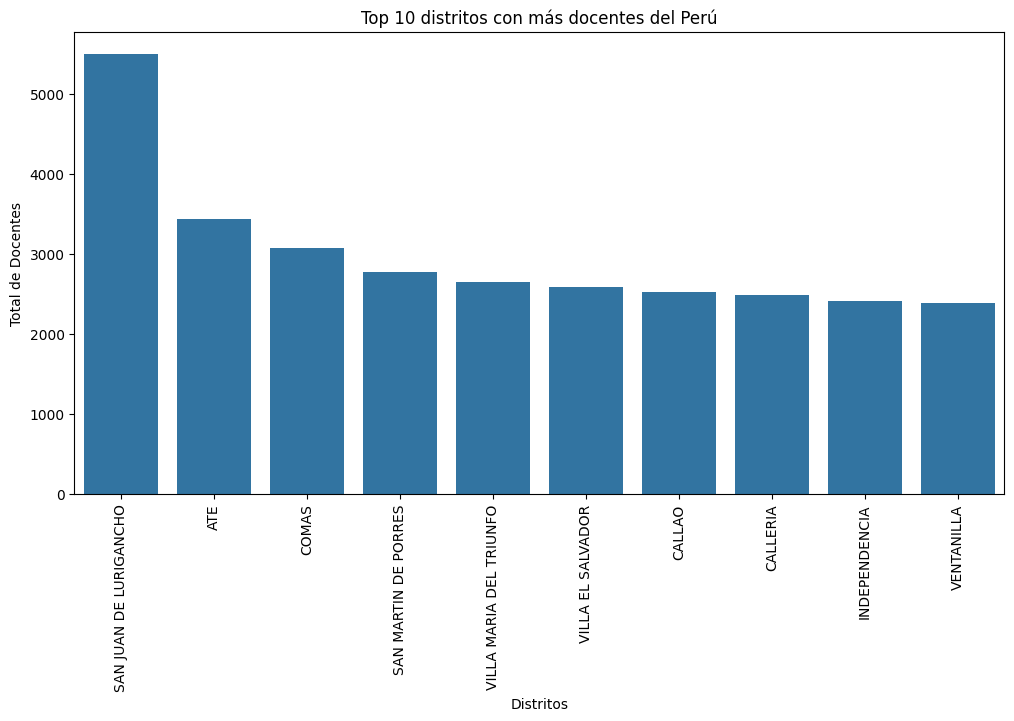

In [50]:
top = int(input('Ingrese el top distritos que deseas: '))

plt.figure(figsize=(12,6))
sns.barplot(data = group_dist_count.head(top), x='dist', y='docentes_total')
plt.title(f'Top {top} distritos con más docentes del Perú')
plt.xticks(rotation=90)
plt.xlabel('Distritos')
plt.ylabel('Total de Docentes')
plt.show()

- Presenta una mayor cantidad de docentes el distrito de **SJL**

.

Gráficas de barras según el nivel_educativo

In [52]:
group_niv_mod_count = df.groupby('niv_mod')['docentes_total'].sum().reset_index()
group_niv_mod_count

,niv_mod,docentes_total
0,A2,58760
1,B0,151920
2,F0,155293


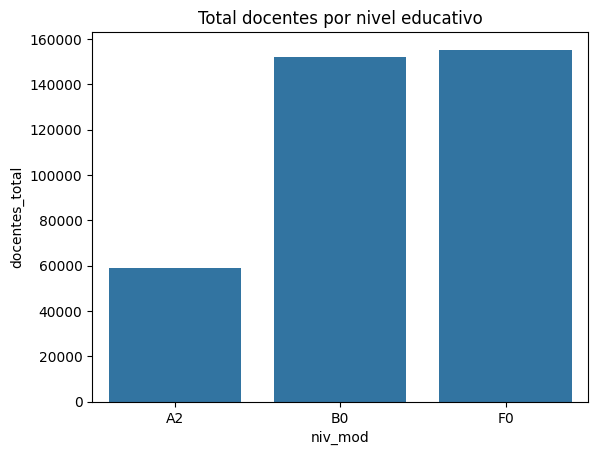

In [54]:
sns.barplot(data=group_niv_mod_count, x='niv_mod', y='docentes_total')
plt.title('Total docentes por nivel educativo')
plt.show()

Gráfico de barras por género

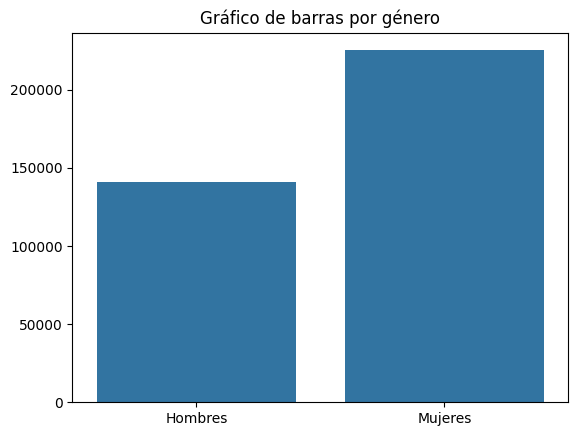

In [55]:
sexo = {
    'Hombres': df['docentes_hombres'].sum(),
    'Mujeres': df['docentes_mujeres'].sum()
}

sns.barplot(x=list(sexo.keys()), y = list(sexo.values()))
plt.title('Gráfico de barras por género')
plt.show()